In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import networkx as nx
import scipy as sp
from scipy import stats

# import sys
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams.update({
    "lines.color": "black",
    "patch.edgecolor": "black",
    "text.color": "black",
    "axes.facecolor": "white",
    "axes.edgecolor": "black",
    "axes.labelcolor": "black",
    "xtick.color": "black",
    "ytick.color": "black",
    "grid.color": "white",
    "figure.facecolor": "white",
    "figure.edgecolor": "white",
    "savefig.facecolor": "white",
    "savefig.edgecolor": "white",
    "font.size": 25})

In [2]:
real_df = pd.read_csv("lifeTimes_real.csv")
prediction_df = pd.read_csv("lifeTimes.csv")

In [3]:
real = []
pred = []
p_values = []
t = []
for index, row in real_df.iterrows():
    real_life_time = row['life_time']
    real_life_time_error = row['error']
    predicted_life_time = prediction_df.iloc[index]['life_time']
    if real_life_time == -1:
        continue
    real.append(real_life_time)
    pred.append(predicted_life_time)
    p_values.append(stats.t.sf(np.abs(((real_life_time - predicted_life_time) / real_life_time_error)), row['count'] - 1) * 2)
    t.append(np.abs(((real_life_time - predicted_life_time) / real_life_time_error)))

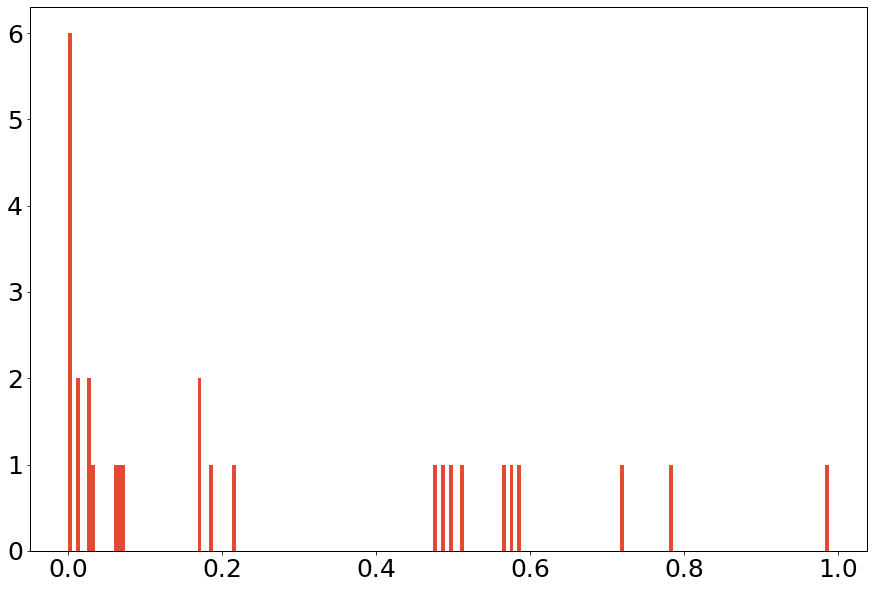

In [4]:
plt.hist(p_values, bins=200)
plt.show()

In [5]:
print(np.average(p_values))

0.25865564292682747


In [6]:
stats.t.sf(10, 999) * 2

1.6708218826871545e-22

In [7]:
error_agg = 0
error_count = 0
errors = []
real = []
pred = []
for index, row in real_df.iterrows():
    real_life_time = row['life_time']
    predicted_life_time = prediction_df.iloc[index]['life_time']
    if real_life_time == -1:
        continue
    real.append(real_life_time)
    pred.append(predicted_life_time)
    error_agg += np.abs(real_life_time - predicted_life_time) / real_life_time
    errors.append(np.abs(real_life_time - predicted_life_time) / real_life_time)
    error_count += 1

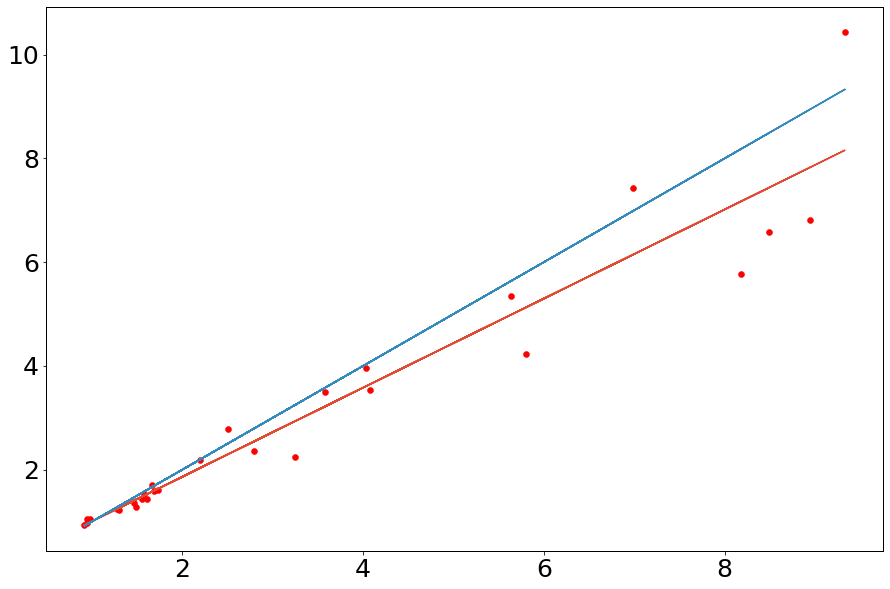

slop is  0.858681549886956
b is  0.1454140650872173


In [8]:
plt.scatter(pred, real, color='r')
# plt.errorbar(pred[:2], real[:2], yerr=real_data_errors[:2], fmt='o')
m, b = np.polyfit(np.array(pred), np.array(real), 1)
plt.plot(np.array(pred), m*np.array(pred) + b)
plt.plot(np.array(pred), 1*np.array(pred) + 0)
plt.show()
print ("slop is ", m)
print ("b is ", b)

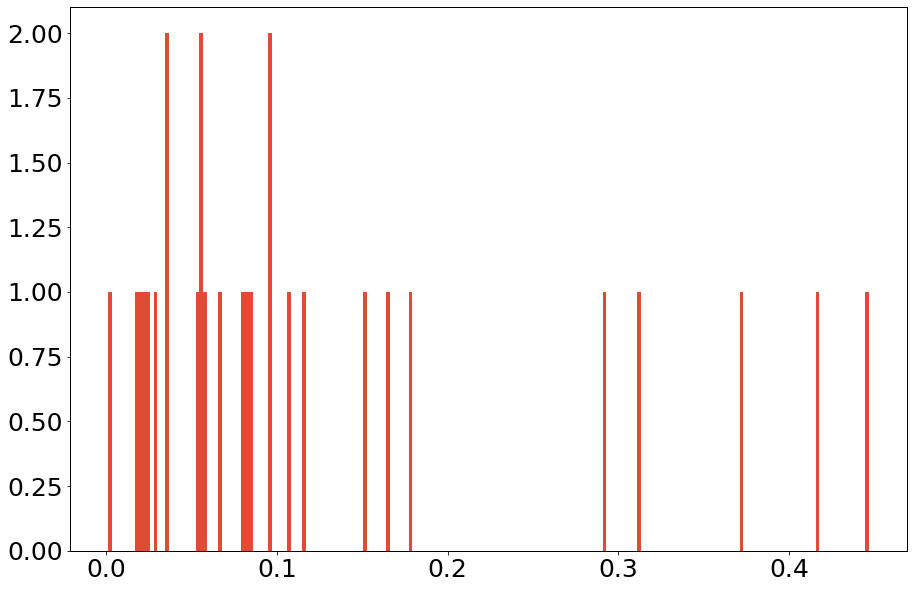

In [9]:
plt.hist(errors, bins=200)
plt.show()

In [10]:
plt.scatter(real, experiment_errors)
# plt.scatter(pred, errors, color='g')
plt.show()



NameError: name 'experiment_errors' is not defined

In [10]:
error_agg = 0
error_count = 0
errors = []
real = []
pred = []
for index, row in real_df.iterrows():
    real_life_time = row['life_time']
    predicted_life_time = prediction_df.iloc[index]['life_time']
    if real_life_time == -1:
        continue
    real.append(real_life_time)
    pred.append(predicted_life_time)
    error_agg += np.abs(real_life_time - predicted_life_time) / real_life_time
    errors.append(np.abs(real_life_time - predicted_life_time) / real_life_time)
    error_count += 1

In [12]:
print(error_agg / error_count)
print(error_count)
print(np.average(real))

0.12379786220478979
28
3.0547583819241986


slop is  0.964014529884218
b is  0.15152792970567316


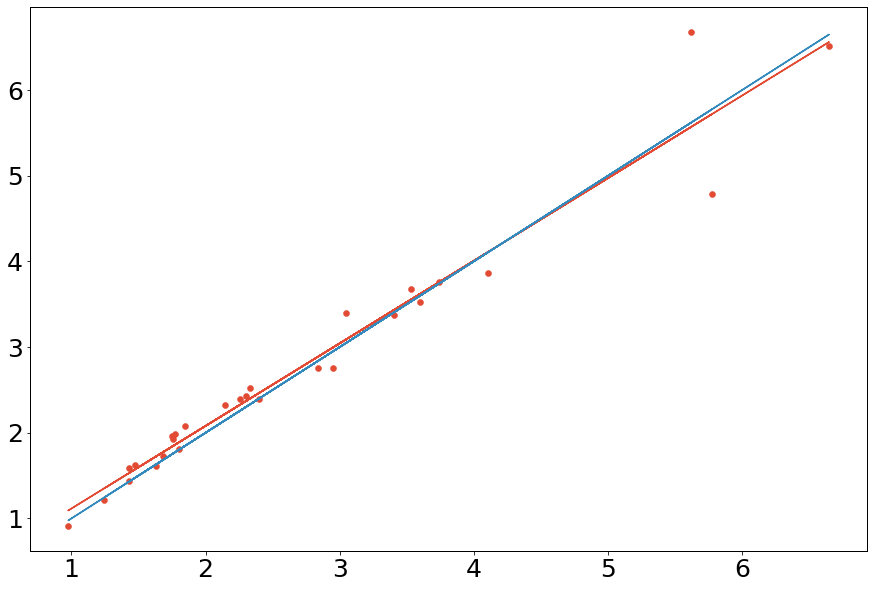

In [17]:
plt.scatter(pred, real)
m, b = np.polyfit(np.array(pred), np.array(real), 1)
plt.plot(np.array(pred), m*np.array(pred) + b)
plt.plot(np.array(pred), 1*np.array(pred) + 0)
print ("slop is ", m)
print ("b is ", b)

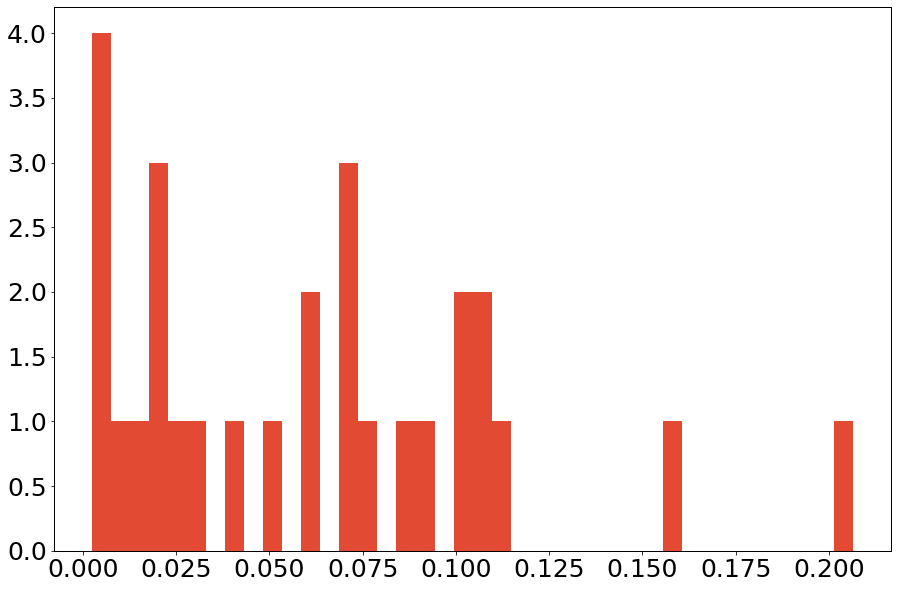

In [18]:
plt.hist(errors, bins=40)
plt.show()

In [19]:
number_of_nodes = 100
seed = 1
last_id = 0
G = nx.gnp_random_graph(number_of_nodes, 0.1, seed=seed)
graph_df = pd.read_csv("channels.csv")
for u,v,a in G.edges(data=True):
        a["id"] = last_id
        a["node1_id"] = u
        a["node2_id"] = v
        a["capacity"] = int(graph_df[graph_df['id'] == last_id]['capacity'])
        last_id += 1
        # print(u, v, a)
EBC = nx.edge_betweenness_centrality(G, k=None, normalized=False, weight=None)

TypeError: cannot convert the series to <class 'int'>

In [20]:
error_agg = 0
error_count = 0
errors = []
real = []
pred = []
ebc = []
real_df = pd.read_csv("lifeTimes_real.csv")
prediction_df = pd.read_csv("lifeTimes.csv")
for index, row in real_df.iterrows():
    real_life_time = row['life_time']
    predicted_life_time = prediction_df.iloc[index]['life_time']
    if real_life_time == -1:
        continue
    real.append(real_life_time)
    pred.append(predicted_life_time)
    error_agg += np.abs(real_life_time - predicted_life_time) / real_life_time
    error_count += 1
    errors.append(np.abs(real_life_time - predicted_life_time) / real_life_time)
    for u,v,a in G.edges(data=True):
        if a['id'] == row['channel_id']:
            ebc.append(EBC[(u, v)])

NameError: name 'EBC' is not defined

In [21]:
plt.scatter(capacities, errors)

NameError: name 'capacities' is not defined

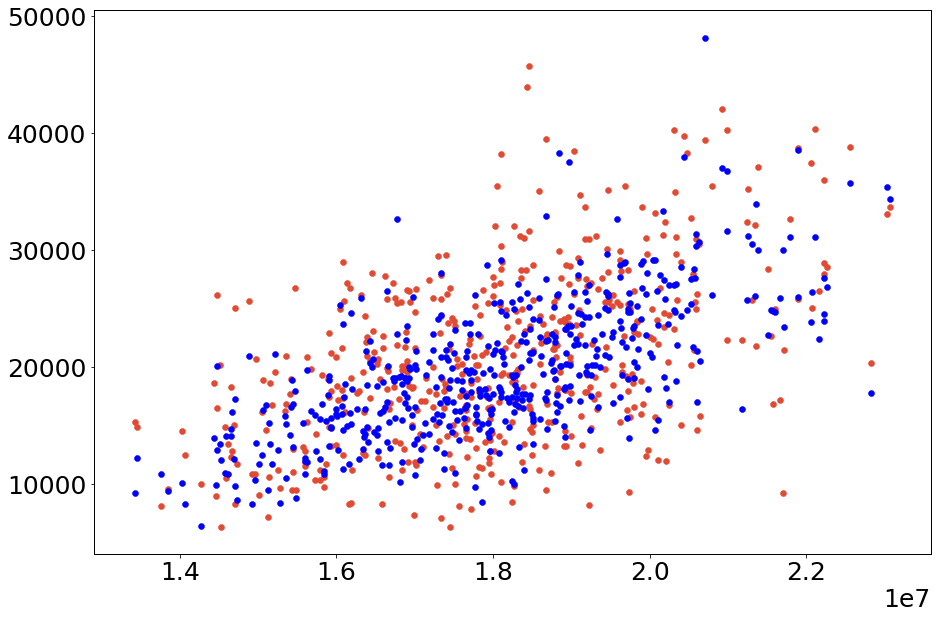

In [151]:
errors = []
real = []
pred = []
capacities = []
real_df = pd.read_csv("lifeTimes_real.csv")
prediction_df = pd.read_csv("lifeTimes.csv")
for index, row in real_df.iterrows():
    real_life_time = 1.4 * row['life_time']
    predicted_life_time = prediction_df.iloc[index]['life_time']
    if real_life_time == -1:
        continue
    real.append(real_life_time)
    pred.append(predicted_life_time)
    errors.append(np.abs(real_life_time - predicted_life_time) / real_life_time)
    
    for u,v,a in G.edges(data=True):
        if a['id'] == row['channel_id']:
            capacities.append(a['capacity'])
plt.scatter(capacities, real)
# plt.show()
plt.scatter(capacities, pred, color='b')
plt.show()